In [1]:
# Ennvironment setup
# Variables
#   sizeX, sizeY : size of the gridworld
# 
# Functions
#   stateNum : input(x,y)= coordinate, output= state number
#   stateNumToCoord : input(st)= state number, output[x,y]= coordinate
#   keepInside : input(x,y)= coordinate, output[x,y]= coordinate
#   moveAgent : input(x,y,a)= coordinate, action, output[x,y]=coordinate
#   wind : input(x,y)=coordinate, output[x,y]=coordinate

sizeX = 6
sizeY = 5
def stateNum(x, y):
    return(x + (y-1) *sizeX -1)

dicAction = {'up':1, 'left':2, 'down':3, 'right':4}

def stateNumToCoord(st):
    return([st % sizeX +1, 1+st // sizeX])  # //, %  division and the remainder

def keepInside(x, y):    
    if (x<1): 
        x=1
    elif (x>sizeX):
        x=sizeX
        
    if (y<1):
        y=1
    elif (y>sizeY):
        y=sizeY
        
    return([x,y])

goalState = stateNum(4,3)


def moveAgent(x, y, a):
   # if (stateNum(x, y) == goalState):
   #     return([x,y])
    if a in dicAction:
        a = dicAction[a]
    
    if (a == 1):
        y = y - 1
    if (a == 2):
        x = x - 1
    if (a == 3):
        y = y + 1
    if (a == 4):
        x = x + 1
    
    return(keepInside(x,y))

def wind(x,y):    
    if (x in [2,5]):
        y=y-1
    if (x in [3,4]):
        y=y-2
    return(keepInside(x,y))




In [2]:
import numpy as np

# Check to see if the functions work fine
for y in np.arange(1,sizeY+1):    
    for x in np.arange(1,sizeX+1):
        print(x,y, stateNum(x,y), stateNumToCoord(stateNum(x,y)))

1 1 0 [1, 1]
2 1 1 [2, 1]
3 1 2 [3, 1]
4 1 3 [4, 1]
5 1 4 [5, 1]
6 1 5 [6, 1]
1 2 6 [1, 2]
2 2 7 [2, 2]
3 2 8 [3, 2]
4 2 9 [4, 2]
5 2 10 [5, 2]
6 2 11 [6, 2]
1 3 12 [1, 3]
2 3 13 [2, 3]
3 3 14 [3, 3]
4 3 15 [4, 3]
5 3 16 [5, 3]
6 3 17 [6, 3]
1 4 18 [1, 4]
2 4 19 [2, 4]
3 4 20 [3, 4]
4 4 21 [4, 4]
5 4 22 [5, 4]
6 4 23 [6, 4]
1 5 24 [1, 5]
2 5 25 [2, 5]
3 5 26 [3, 5]
4 5 27 [4, 5]
5 5 28 [5, 5]
6 5 29 [6, 5]


In [3]:
# Test
print(stateNum(1,1))
print(moveAgent(3,1,'left'))
print(wind(3,4))

0
[2, 1]
[3, 2]


In [4]:
import numpy as np

istate = 1

# Environment : Transition = wind + action
# sNext[sCurrent, action] : next state when the current state is sCurrent and action is taken.
sNext = np.zeros((sizeX*sizeY, 4), dtype=np.int)

for istate in range(sizeX*sizeY):
    for iaction in [1,2,3,4]:
        x, y=stateNumToCoord(istate)
        x, y=wind(x,y)
        x, y=moveAgent(x, y, iaction)        
        sNext[istate, iaction-1] = int(stateNum(x,y))
sNext[goalState,:]=goalState

# Testing
istate=27;
iaction = 1
x, y=stateNumToCoord(istate)
print(x,y)
x, y=wind(x,y)
print(x,y)
x, y=moveAgent(x, y, iaction)        
print(x,y)
sNext[istate, iaction-1] = int(stateNum(x,y))
print(sNext[27,:])


4 5
4 3
4 2
[ 9 14 21 16]


In [5]:
# goal state
print(stateNumToCoord(goalState))
print(goalState)
sNext[27,:]

[4, 3]
15


array([ 9, 14, 21, 16])

In [6]:
# calculating P(s' | s, a) -> Tr[s,a,s']
nstate = sizeX*sizeY
naction = 4
Tr = np.zeros((nstate, naction, nstate), dtype=np.int)

for istate in range(nstate):
    for iaction in [1,2,3,4]:        
        for jstate in range(nstate):
            if jstate == sNext[istate, iaction-1]:
                Tr[istate,iaction-1, jstate] = 1
            else:
                Tr[istate,iaction-1, jstate] = 0

In [7]:
# arrR[s, a, s'] = R(s,a,s')
arrR = np.zeros((nstate, naction, nstate), dtype=np.float)
arrR[:,:,:] = -1
arrR[goalState, :, :] = 0

In [8]:
# ER [s,a'] = Expected rewards of R(s,a,s') over s'
ER = np.zeros((nstate, naction), dtype=np.float)
for istate in range(nstate):
    for iaction in [1,2,3,4]:
        ER[istate, iaction-1] = sum(arrR[istate, iaction-1, :] * Tr[istate, iaction-1, :])

In [9]:
# pi : policy
# pi0 : random policy with pi(a|s)=1/4
pi0 = np.zeros((nstate, naction), dtype=np.float)
pi0[:, :] = 1/4

In [10]:
# matT[(s,a), (s',a')] = P((s',a')|(s,a)) given policy pi0
matT = np.zeros((nstate*naction, nstate*naction), dtype=np.float)
for istate in range(nstate):
    for iaction in range(naction):
        for jstate in range(nstate):
            for jaction in range(naction):
                matT[istate*naction +iaction, jstate*naction+jaction] = Tr[istate, iaction, jstate] * pi0[jstate, jaction]

In [11]:
# test : given (1,1), 1:'up', what's the probablity of (1,1),2:'left'
matT[stateNum(1,1)*naction + 0, stateNum(1,1)*naction + 1]

0.25

In [12]:
I=np.diag(np.ones(nstate*naction))  # identity matrix I

In [13]:
gamma=0.999
inv=np.linalg.inv(I- gamma*matT)   # can't solve the equation with gamma=1
print(inv)
vER = np.ndarray.flatten(ER)
np.dot(inv, vER)

[[ 17.08340901  16.08340901  16.08340901 ...,   0.5196498    0.5196498
    0.5196498 ]
 [ 16.08340901  17.08340901  16.08340901 ...,   0.5196498    0.5196498
    0.5196498 ]
 [ 15.67715001  15.67715001  16.67715001 ...,   0.5196498    0.5196498
    0.5196498 ]
 ..., 
 [ 12.17396425  12.17396425  12.17396425 ...,   1.54749855   0.54749855
    0.54749855]
 [ 11.71464056  11.71464056  11.71464056 ...,   1.12179734   2.12179734
    1.12179734]
 [ 11.71464056  11.71464056  11.71464056 ...,   1.12179734   1.12179734
    2.12179734]]


array([ -6.10522607e+02,  -6.10522607e+02,  -6.10522607e+02,
        -6.08963138e+02,  -6.08963138e+02,  -6.10522607e+02,
        -6.08963138e+02,  -6.05837956e+02,  -6.05837956e+02,
        -6.08963138e+02,  -6.05837956e+02,  -6.01134547e+02,
        -6.01134547e+02,  -6.05837956e+02,  -6.01134547e+02,
        -5.94834080e+02,  -5.94834080e+02,  -6.01134547e+02,
        -5.94834080e+02,  -5.86911326e+02,  -5.86911326e+02,
        -5.94834080e+02,  -5.77334564e+02,  -5.86911326e+02,
        -6.10522607e+02,  -6.10522607e+02,  -6.10522607e+02,
        -6.08963138e+02,  -6.08963138e+02,  -6.10522607e+02,
        -6.08963138e+02,  -6.05837956e+02,  -6.05837956e+02,
        -6.08963138e+02,  -6.05837956e+02,  -6.01134547e+02,
        -6.01134547e+02,  -6.05837956e+02,  -6.01134547e+02,
        -5.94834080e+02,  -5.94834080e+02,  -6.01134547e+02,
        -5.94834080e+02,  -5.86911326e+02,  -5.86911326e+02,
        -5.94834080e+02,  -5.48565932e+02,  -5.77334564e+02,
        -6.10522607e+02,

In [14]:
# vectorized Expected reward(s,a) 
vER = np.ndarray.flatten(ER)
vER = vER.reshape((nstate*naction,1))

# vectorized Q(s,a)
vQ = np.zeros((nstate*naction,1))
#print(vQ.shape)
for _ in range(1000):
    vQ = vER + np.dot(matT, vQ)

print(vQ)

[[-743.3071585 ]
 [-743.3071585 ]
 [-743.3071585 ]
 [-741.39205735]
 [-741.39205735]
 [-743.3071585 ]
 [-741.39205735]
 [-737.55624645]
 [-737.55624645]
 [-741.39205735]
 [-737.55624645]
 [-731.78852371]
 [-731.78852371]
 [-737.55624645]
 [-731.78852371]
 [-724.07212369]
 [-724.07212369]
 [-731.78852371]
 [-724.07212369]
 [-714.38476266]
 [-714.38476266]
 [-724.07212369]
 [-702.69869856]
 [-714.38476266]
 [-743.3071585 ]
 [-743.3071585 ]
 [-743.3071585 ]
 [-741.39205735]
 [-741.39205735]
 [-743.3071585 ]
 [-741.39205735]
 [-737.55624645]
 [-737.55624645]
 [-741.39205735]
 [-737.55624645]
 [-731.78852371]
 [-731.78852371]
 [-737.55624645]
 [-731.78852371]
 [-724.07212369]
 [-724.07212369]
 [-731.78852371]
 [-724.07212369]
 [-714.38476266]
 [-714.38476266]
 [-724.07212369]
 [-667.60738056]
 [-702.69869856]
 [-743.3071585 ]
 [-743.3071585 ]
 [-743.3071585 ]
 [-741.39205735]
 [-741.39205735]
 [-743.3071585 ]
 [-741.39205735]
 [-737.55624645]
 [-737.55624645]
 [-741.39205735]
 [-737.5562464

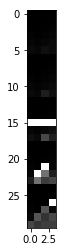

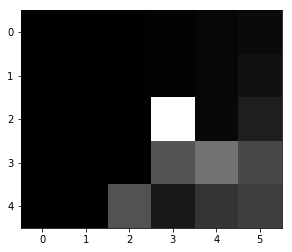

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

matQ =  np.reshape(vQ , (nstate, naction))
V = np.zeros(nstate)
for istate in range(nstate):
    for iaction in range(naction):
        V[istate] = sum(matQ[istate,:]*pi0[istate,:])

plt.imshow(matQ, cmap=cm.Greys_r)
plt.show()

matV = np.reshape(V, (sizeY, sizeX))
plt.imshow(matV, cmap=cm.Greys_r)
plt.show()

In [16]:
pi1 = np.zeros((nstate, naction), dtype=np.float)

matQ = np.reshape(vQ , (nstate, naction))


for istate in range(nstate):
    nQ = sum(matQ[istate,:]==max(matQ[istate,:]))
    pi1[istate,matQ[istate,:]==max(matQ[istate,:])] = 1/nQ
    
matT = np.zeros((nstate*naction, nstate*naction), dtype=np.float)
for istate in range(nstate):
    for iaction in range(naction):
        for jstate in range(nstate):
            for jaction in range(naction):
                matT[istate*naction +iaction, jstate*naction+jaction] = Tr[istate, iaction, jstate] * pi1[jstate, jaction]

In [17]:
vER = np.ndarray.flatten(ER)
vER = vER.reshape((nstate*naction,1))

vQ = np.zeros((nstate*naction,1))
for _ in range(1000):
    vQ = vER + np.dot(matT, vQ)

#print(vQ)

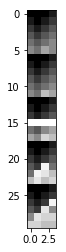

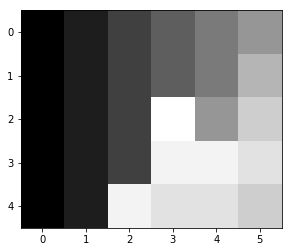

In [18]:
matQ =  np.reshape(vQ , (nstate, naction))
V = np.zeros(nstate)
for istate in range(nstate):
    for iaction in range(naction):
        V[istate] = sum(matQ[istate,:]*pi1[istate,:])

plt.imshow(matQ, cmap=cm.Greys_r)
plt.show()

matV = np.reshape(V, (sizeY, sizeX))
plt.imshow(matV, cmap=cm.Greys_r)
plt.show()

In [19]:
print(vQ)

[[-11.]
 [-11.]
 [-11.]
 [-10.]
 [-10.]
 [-11.]
 [-10.]
 [ -9.]
 [ -9.]
 [-10.]
 [ -9.]
 [ -8.]
 [ -8.]
 [ -9.]
 [ -8.]
 [ -7.]
 [ -7.]
 [ -8.]
 [ -7.]
 [ -6.]
 [ -6.]
 [ -7.]
 [ -5.]
 [ -6.]
 [-11.]
 [-11.]
 [-11.]
 [-10.]
 [-10.]
 [-11.]
 [-10.]
 [ -9.]
 [ -9.]
 [-10.]
 [ -9.]
 [ -8.]
 [ -8.]
 [ -9.]
 [ -8.]
 [ -7.]
 [ -7.]
 [ -8.]
 [ -7.]
 [ -6.]
 [ -6.]
 [ -7.]
 [ -4.]
 [ -5.]
 [-11.]
 [-11.]
 [-11.]
 [-10.]
 [-10.]
 [-11.]
 [-10.]
 [ -9.]
 [ -9.]
 [-10.]
 [ -9.]
 [ -8.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [ -7.]
 [ -8.]
 [ -6.]
 [ -5.]
 [ -5.]
 [ -6.]
 [ -3.]
 [ -4.]
 [-11.]
 [-11.]
 [-11.]
 [-10.]
 [-10.]
 [-11.]
 [-10.]
 [ -9.]
 [ -9.]
 [-10.]
 [ -9.]
 [ -8.]
 [ -8.]
 [ -9.]
 [ -1.]
 [ -7.]
 [ -7.]
 [ -1.]
 [ -2.]
 [ -4.]
 [ -4.]
 [ -2.]
 [ -4.]
 [ -3.]
 [-11.]
 [-11.]
 [-11.]
 [-10.]
 [-10.]
 [-11.]
 [-10.]
 [ -9.]
 [ -9.]
 [-10.]
 [ -9.]
 [ -1.]
 [ -8.]
 [ -9.]
 [ -2.]
 [ -6.]
 [ -6.]
 [ -2.]
 [ -3.]
 [ -3.]
 [ -3.]
 [ -3.]
 [ -4.]
 [ -4.]]
